In [1]:
# NN-Tools
import numpy as np
import tensorflow.keras as keras
# Printing
from IPython.display import display
import sympy as sp
sp.init_printing(use_latex=True)
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# XOR data set
X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
Y = np.array([0,1,1,0])

# One
---

In [3]:
# Multi-layer net with ReLU hidden layer
model = keras.models.Sequential()

# Here we make the hidden layer (size 2) with a ReL
# activation function, but also initialize the bias
# weights in the network to a constant 0.1
model.add(keras.layers.Dense(10,input_dim=2,activation='relu',
bias_initializer=keras.initializers.Constant(0.03)))

#model.add(keras.layers.Dense(4,input_dim=2,activation='relu',
#bias_initializer=keras.initializers.Constant(0.01)))

# Output layer (size 1), sigmoid activation function
model.add(keras.layers.Dense(1,activation='sigmoid'))

# Compile as above (default learning rate and other
# hyperparameters for the Adam optimizer).
model.compile(loss=keras.losses.BinaryCrossentropy(),
optimizer=keras.optimizers.Nadam())

# Sample plot of classification space
xpoints = np.linspace(-2,2,20)
ypoints = np.linspace(-2,2,20)
xgrid, ygrid = np.meshgrid(xpoints,ypoints)
positions = np.vstack([xgrid.ravel(),ygrid.ravel()]).T

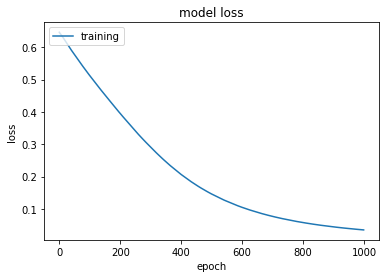

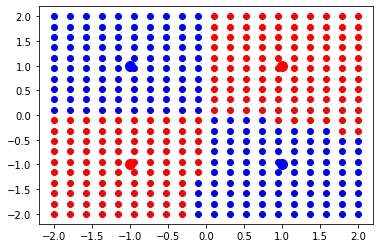

1/1 [==============================] - 0s 122ms/step - loss: 0.0349
Loss:  0.034923672676086426


In [4]:
# Train it!
history = model.fit(X, Y,
 batch_size=5,
 epochs=1000,
 verbose=0)

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training'], loc='upper left')
plt.show()

# Let's color those points by the classification labels...
predictions = np.round(model.predict(positions)[:,0])
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]
# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')
# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

score = model.evaluate(X,Y,verbose=1)
print("Loss: ", score)

# Two
---

The split nature of the data wouldn't be consistently solveable with a hidden layer of only two units. Increasing the number of hidden units alone would allow for much better results and increasing the number of epochs by so much was likely unecessary. 

# Three
---

In [5]:
# Multi-layer net with ReLU hidden layer
model = keras.models.Sequential()

# Here we make the hidden layer (size 2) with a ReL
# activation function, but also initialize the bias
# weights in the network to a constant 0.1
model.add(keras.layers.Dense(4,input_dim=2,activation='relu',
bias_initializer=keras.initializers.Constant(0.03)))

# Output layer (size 1), sigmoid activation function
model.add(keras.layers.Dense(1,activation='sigmoid'))

# Compile as above (default learning rate and other
# hyperparameters for the Adam optimizer).
model.compile(loss=keras.losses.BinaryCrossentropy(),
optimizer=keras.optimizers.Nadam())

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


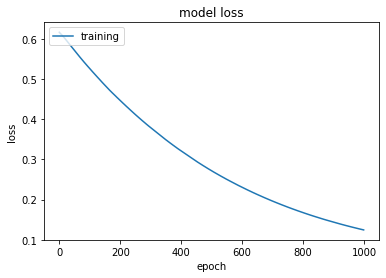

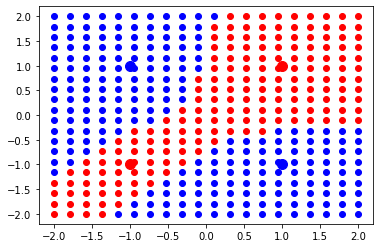

1/1 [==============================] - 0s 93ms/step - loss: 0.1242
Loss:  0.12416358292102814


In [6]:
# Train it!
history = model.fit(X, Y,
 batch_size=5,
 epochs=1000,
 verbose=0)

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training'], loc='upper left')
plt.show()

# Let's color those points by the classification labels...
predictions = np.round(model.predict(positions)[:,0])
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]
# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')
# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

score = model.evaluate(X,Y,verbose=1)
print("Loss: ", score)

# Four
---

In the XOR problem given, the data can technically be categorized correctly using 2 planes. Using 2 units in the hidden layer we can accomplish this. I found using 4 units in the hidden layer to be more consistent though. 

# Five
---

In [7]:
from keras.datasets import mnist

# Digits are zero through nine, so 10 classes
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Data normalization (0-255 is encoded as 0-1 instead)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(200,activation='tanh',input_shape=[x_train.shape[1]]))

model.add(keras.layers.Dense(100, input_dim=150, activation='tanh'))

model.add(keras.layers.Dense(10,input_dim=50,activation='softmax'))

model.compile(loss=keras.losses.CategoricalCrossentropy(),
 optimizer=keras.optimizers.Nadam(),
 metrics=[keras.metrics.CategoricalAccuracy()])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Train it!
history = model.fit(x_train, y_train,
 batch_size=128,
 epochs=30,
 verbose=0,
 validation_split = 0.2)
score = model.evaluate(x_test, y_test, verbose=0)

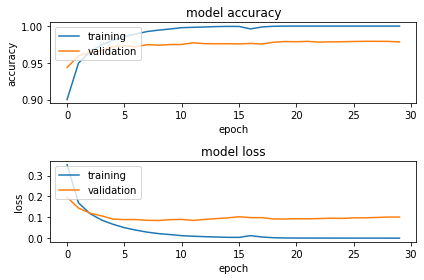

Test loss: 0.08959168940782547
Test accuracy: 0.9805999994277954


In [10]:
plt.figure()

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.tight_layout()
plt.show() 

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Six
---

In [11]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(300 ,input_shape=[x_train.shape[1]],activation='relu',
bias_initializer=keras.initializers.Constant(0.05)))

model.add(keras.layers.Dense(100,input_dim=100,activation='relu',
bias_initializer=keras.initializers.Constant(0.02)))

model.add(keras.layers.Dense(10, input_dim = 100, activation='softmax'))

model.compile(loss=keras.losses.CategoricalCrossentropy(),
 optimizer=keras.optimizers.Nadam(),
 metrics=[keras.metrics.CategoricalAccuracy()])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


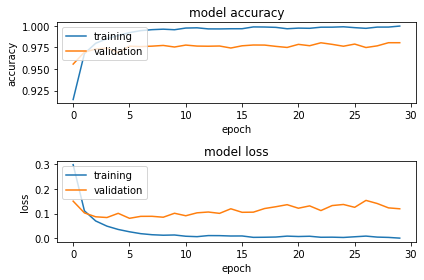

Test loss: 0.10537616163492203
Test accuracy: 0.9818999767303467


In [12]:
# Train it!
history = model.fit(x_train, y_train,
 batch_size=128,
 epochs=30,
 verbose=0,
 validation_split = 0.2)
score = model.evaluate(x_test, y_test, verbose=0)

plt.figure()

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.tight_layout()
plt.show() 

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Seven 
---

The loss curve decreases slightly faster for the relu network because of the rapid change in the functions own curve